<a href="https://colab.research.google.com/github/suba2305/TSALAB/blob/main/TSA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', periods=100, freq='D')
data = np.cumsum(np.random.randn(100))  # Cumulative sum to introduce a trend
df = pd.DataFrame({'Date': date_range, 'Value': data})


In [3]:
window_size = 5  # Define the window size for the moving average
df['SMA'] = df['Value'].rolling(window=window_size).mean()


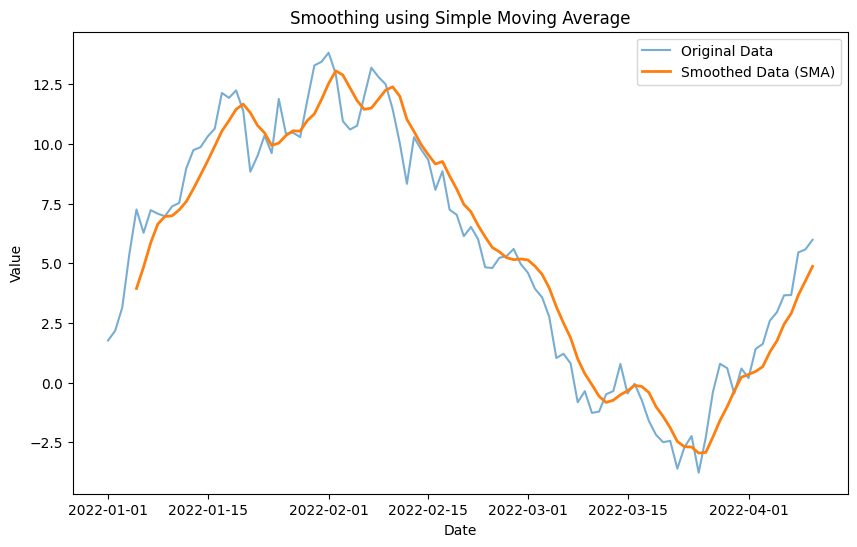

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data', alpha=0.6)
plt.plot(df['Date'], df['SMA'], label='Smoothed Data (SMA)', linewidth=2)
plt.title('Smoothing using Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [5]:
df['EMA'] = df['Value'].ewm(span=window_size, adjust=False).mean()

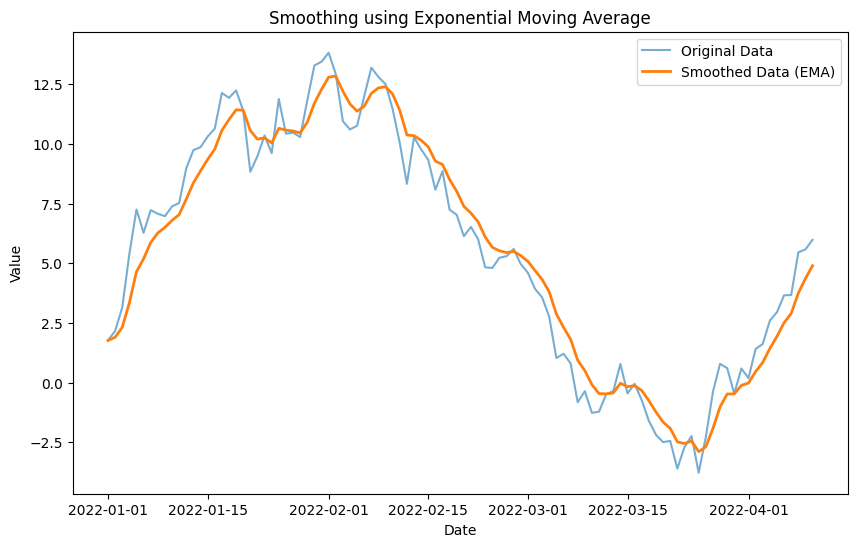

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data', alpha=0.6)
plt.plot(df['Date'], df['EMA'], label='Smoothed Data (EMA)', linewidth=2)
plt.title('Smoothing using Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
df['Differenced'] = df['Value'].diff()

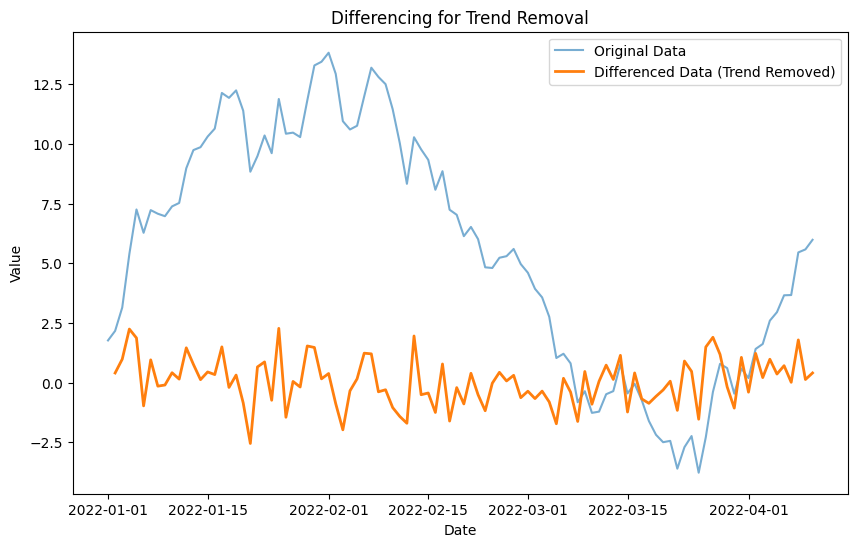

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data', alpha=0.6)
plt.plot(df['Date'], df['Differenced'], label='Differenced Data (Trend Removed)', linewidth=2)
plt.title('Differencing for Trend Removal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
import statsmodels.api as sm

In [10]:
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive', period=30)

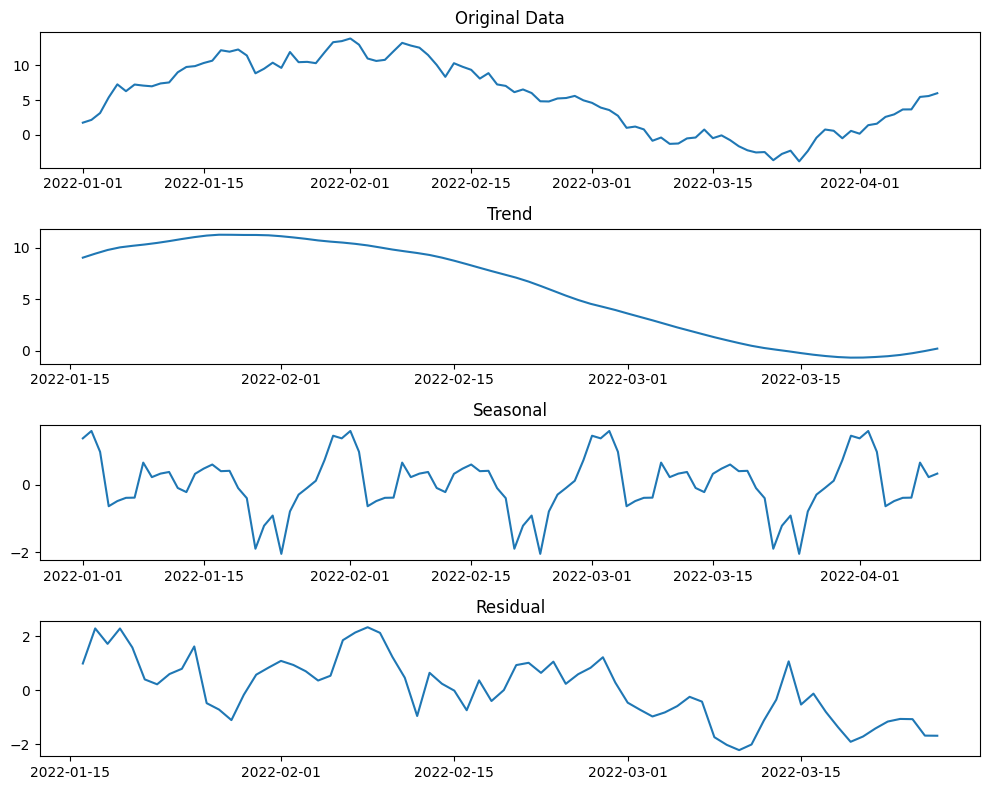

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Original Data')

plt.subplot(412)
plt.plot(df['Date'], decomposition.trend, label='Trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(df['Date'], decomposition.seasonal, label='Seasonal')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(df['Date'], decomposition.resid, label='Residual')
plt.title('Residual')

plt.tight_layout()
plt.show()